In [3]:
import requests
import shutil
def callme():
    url = "https://www.cryptodatadownload.com/cdd/gemini_BTCUSD_1hr.csv"
    r = requests.get(url, verify=False,stream=True)
    if r.status_code!=200:
        print ("Failure!!")
        exit()
    else:
        r.raw.decode_content = True
        with open("file1.csv", 'wb') as f:
            shutil.copyfileobj(r.raw, f)
        print ("Success")

if __name__ == '__main__':
    callme()

/Users/natananisimov/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cryptodatadownload.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Success


In [4]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('/Users/natananisimov/Desktop/file1.csv')
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Unix Timestamp', 'Date'])
df = df[df['Datetime'] >= '2020-01-01 00:00:00']

In [91]:
df

,Symbol,Open,High,Low,Close,Volume,Datetime
1,BTCUSD,32280.22,32314.53,32138.94,32138.94,9.12381051,2021-06-27 00:00:00
2,BTCUSD,31781.59,32280.22,31631.57,32280.22,125.2705329378,2021-06-26 23:00:00
3,BTCUSD,31434.92,31803.55,31384.75,31781.59,66.2759265608,2021-06-26 22:00:00
4,BTCUSD,31307.04,31434.92,30926.76,31434.92,67.6057577701,2021-06-26 21:00:00
5,BTCUSD,31595.77,31632.57,30999.11,31307.04,92.4121671319,2021-06-26 20:00:00
...,...,...,...,...,...,...,...
13029,BTCUSD,7199.04,7206.53,7187.99,7188.73,42.0973834665,2020-01-01 04:00:00
13030,BTCUSD,7220.05,7221.06,7194.27,7199.04,25.4437312583,2020-01-01 03:00:00
13031,BTCUSD,7185.97,7224.53,7185.97,7220.05,121.4656203492,2020-01-01 02:00:00
13032,BTCUSD,7149.03,7199.21,7149.03,7185.97,127.4273929551,2020-01-01 01:00:00


In [110]:
df['sma_short'] = df.Close.rolling(window=14, center=False).mean()
df['sma_long'] = df.Close.rolling(window=36, center=False).mean()
df = df.dropna()
df = df.reset_index()

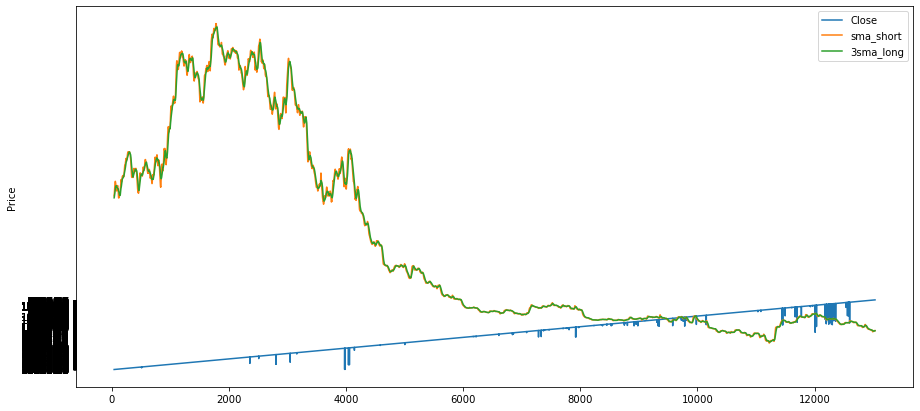

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(df.index, df.Close)
plt.plot(df.index, df.sma_short)
plt.plot(df.index, df.sma_long)
plt.legend(['Close','sma_short', 'sma_long'])
plt.ylabel('Price')
plt.show()

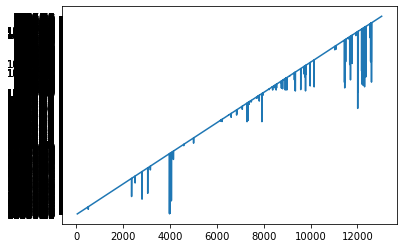

In [103]:
plt.plot(df.Close)

In [ ]:
payoff = [df.Close[0]]

for i in range(len(df)-1):
        
    for topic in signals[tick]['Positive']:
            
        positive_score += table[topic][i] * signals[tick]['Positive'][topic]
            
    for topic in signals[tick]['Negative']:
            
        negative_score += table[topic][i] * signals[tick]['Negative'][topic]
        
    if positive_score > negative_score:
            
        x = table['Close'][i+1]*0.99975 - table['Close'][i]*1.00025
            
    elif negative_score > positive_score:
            
        x = table['Close'][i]*0.99975 - table['Close'][i+1]*1.00025
            
    else:

        x = 0

    payoff.append(x)

In [122]:
float(df['Close'][0]) + float(df['Close'][1])

65154.479999999996

In [132]:
payoff = [float(df['Close'][0])]

for i in range(len(df)-1):
    if float(df['sma_short'][i]) > float(df['sma_long'][i]):
        x = - float(df['Close'][i])
        
    elif float(df['sma_short'][i]) < float(df['sma_long'][i]):
        x = float(df['Close'][i])
        
    else:
        x = 0
        
    payoff.append(x)

Annual Return: 13.57 %
Annual Volatility: 2.41
Sharp ratio: 0.056
Max DD: -1925.3 %
Deals number: 12963
Positive deals: 7430 57.321 %
Negative deals: 5532 42.679 %


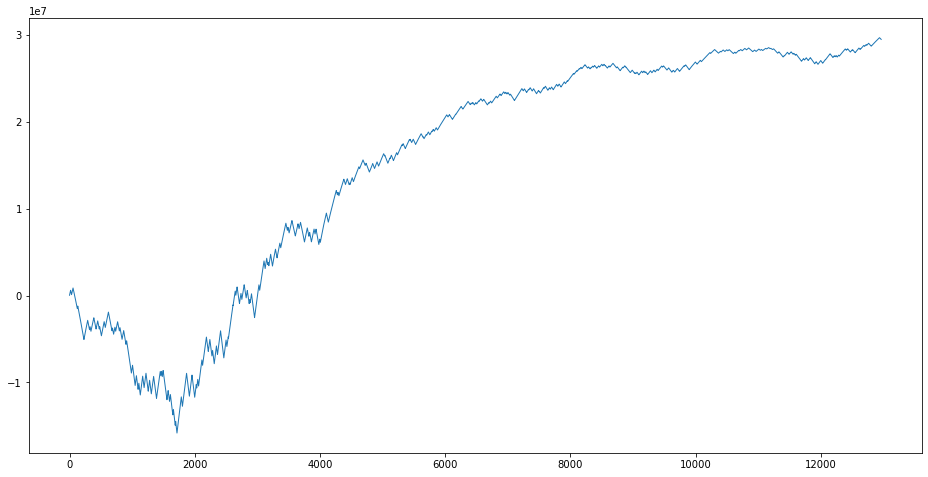

In [157]:
z = pd.DataFrame(payoff, columns = ['V'])
z['cum_V'] = z['V'].cumsum()
z['y'] = z['cum_V'].pct_change()

#y_1 = np.log(z['cum_V'])-np.log(z['cum_V'].shift(1))
sigma = z['y'].std()*np.sqrt(252)
mean = ((1+z['y'].mean())**252)-1
sharpe = mean/sigma
plt.figure(figsize=(16,8))
plt.plot(z.index, z['cum_V'], linewidth=1.0)
maxdd = (z['cum_V'].shift(-1)/z['cum_V'].shift(-1).cummax() - 1).min()
   
print('Annual Return:', round(100*mean,2),'%')
print('Annual Volatility:', round(sigma,2))
print('Sharp ratio:',round(sharpe,3))
print('Max DD:', round(100*maxdd,2),'%')
print('Deals number:', len(payoff))
print('Positive deals:', len(z[z['y']>0]), round(100*len(z[z['y']>0])/(len(z[z['y']>0])+ len(z[z['y']<0])),3),'%')
print('Negative deals:', len(z[z['y']<0]), round(100*len(z[z['y']<0])/(len(z[z['y']>0])+ len(z[z['y']<0])),3),'%')

In [159]:
import itertools

is_negative = [True if num < 0 else False for num in z['y'].dropna()]
groups = itertools.groupby(is_negative)
occurrences_of_negatives = [len(list(g)) for k, g in groups if k]

result = max(occurrences_of_negatives)

In [161]:
print('максимальное количество убыточных сделок подряд:', result)

максимальное количество убыточных сделок подряд: 84
